# Code from precvious chapters
Shift-click to execute the cells once such that the functions and variables are known in this workbook 

In [6]:
!!python -m venv jupyter_env
%pip install numpy
%pip install matplotlib


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

  Using cached numpy-2.1.3-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
Using cached numpy-2.1.3-cp313-cp313-macosx_14_0_arm64.whl (5.1 MB)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
  Using cached matplotlib-3.9.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.0-cp313-cp313-macosx_10_13_universal2.whl.metadata (164 kB)
  Using cached kiwisolver-1.4.7-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached pillow-11.0.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.9.3-cp313-cp313-macosx_11_0_arm64.whl (7.8 MB)
Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0

Matplotlib is building the font cache; this may take a moment.


In [7]:
x,y = np.loadtxt('../data/pizza.txt', skiprows=1, unpack=True)
m = len(x)
print('number of examples: m =',m)


number of examples: m = 30


In [8]:
def predict(x, w, b):
    """
    Computes the prediction from the input x, weight w and bias b as y_hat = w*x + b.
    
    parameters:
    -----------
    X: array
        the input ("feature") for the prediction, i.e. the nuber of reservations
        can be a single number or an array of numbers
    w: number 
        the "weight" for this feature in the linear model
    b: number
        the bias of the linear model
    
    returns:
    --------
    y_hat: array 
        the predictions, i.e. the predicted numbers of pizzas that  will be ordered
        the dimensions of y are those of x
    """
    y_hat = w*x + b
    return y_hat


def loss(y, y_hat):
    """
    Computes the loss as the mean squared difference between predicted and true values. 
    
    parameters:
    -----------
    y: array 
        single number or numpy array
        the true label values in the list of examples, i.e. the true numbers of reservations
    y_hat: array
        single number or numpy array
        dimensions must mach those of y
        the predicted values 
    
    returns:
    --------
    loss: number
        the squared error, i.e. the squared difference between prediction and the prediction, i.e. the predicted number of pizzas that  will be ordered. 
    """
    loss = np.mean( (y_hat - y)**2 )
    return loss



def train_naive(x, y, learning_rate=0.001, max_iterations=10000):
    """
    Trains a linear model. The weight-bias space is explored by 
        taking steps in the w-direction and the b-direction separately. 
    If no further improvement is obtained the training stops. 
    If no stop is reached within the maximum number of iterations
        a warning is printed and the current vales are returned.
    
    parameters:
    -----------
    x: array 
        single number or numpy array
        the feature values in the training examples
    y: array
        single number or numpy array
        dimensions must mach those of x
        the label values in the training examples
    learning_rate: number
        the learning rate
    max_iterations: integer
        the maximum number of iterations
    
    returns:
    --------
    [w, b, current_loss, i, ws, bs, losses]
    w: number 
        final weight
    b: number
        final bias
    current_loss: number
        final loss
    i: integer
        number of iterations performed
    ws: list
        weights for all iterations
    bs: list
        biases for all iterations
    losses: list
        loss for all iterations
    """
    w = 0 # initial weight
    b = 0 # initial bias
    
    ws = []
    bs = []
    losses = []
    
    for i in range(max_iterations):
        current_loss = loss(predict(x, w, b), y)
        #print('Iteration %4d: , w=%.3f, b=%.3f, current_loss: %.3f' %(i, w, b, current_loss))
        
        ws.append(w)
        bs.append(b)
        losses.append(current_loss)
        
        if loss(predict(x, w+learning_rate, b), y) < current_loss:
            w += learning_rate
        elif loss(predict(x, w-learning_rate, b), y) < current_loss:
            w -= learning_rate
        elif loss(predict(x, w, b+learning_rate), y) < current_loss:
            b += learning_rate        
        elif loss(predict(x, w, b-learning_rate), y) < current_loss:
            b -= learning_rate        
        else:
            return [w, b, current_loss, i, ws, bs, losses]
    print('Could not converge in ', max_iterations, 'iterations')
    return [w, b, current_loss, i, ws, bs, losses]




# ========================================================
# ===== AUXILIURY FUNCTIONS FOR PLOTTING 
# ========================================================

def plotpath(ws, bs, losses, X=None, Y=None, step=1, xlabel='weight', ylabel='bias', figsize=(12,4)):
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(3, 3)
    ax1 = fig.add_subplot(gs[:, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, 1])
    ax4 = fig.add_subplot(gs[2, 1])
    ax5 = fig.add_subplot(gs[:, 2])
    
    inds = np.arange(len(ws))
    
    # path in 2d parameter space
    ax1.plot(ws[::step], bs[::step], '-')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.annotate('iterations: {} \nfinal weight = {:.3f} \nfinal bias = {:.3f}'.format(len(ws), ws[-1], bs[-1]), (0.5, 0.5), xycoords='axes fraction', va='center')
    ax1.grid()
    
    # weight
    ax2.plot(inds[::step], ws[::step])
    ax2.set_xlabel('iteration')
    ax2.set_ylabel(xlabel)
    ax2.grid()

    # bias
    ax3.plot(inds[::step], bs[::step])
    ax3.set_xlabel('iteration')
    ax3.set_ylabel(ylabel)
    ax3.grid()

    # loss
    ax4.semilogy(inds[::step], losses[::step])
    ax4.set_xlabel('iteration')
    ax4.set_ylabel('loss')
    ax4.annotate('final loss = %.4f'%losses[-1], (0.5, 0.5), xycoords='axes fraction', va='center')
    ax4.grid()

    # data and linear fit
    if X is not None and Y is not None:
        Y_hat = predict(X, ws[-1], bs[-1])
        ax5.plot(X,Y,'bo')
        ax5.plot(X, Y_hat)
        ax5.set_xlabel('feature: number of reservations')
        ax5.set_ylabel('label: number of pizzas')
        ax5.set_xlim([0, 30]) 
        ax5.set_ylim([0, 50]) 
        
    plt.tight_layout()


# Gradient descent

In [9]:
# ==============================================
# ===   WRITE YOUR OWN CODE 
# ==============================================
#
# no help: write everything yourself, including the docstring
#
# Level-1-help: copy/paste the docstring from moodle
#
# Level-2-help: look up the code from the teachers printout

def gradient(x, y, w, b):
    final_vector = []
    y_hat = predict(x, w, b)
    final_vector.append(2 * np.average(x*(y_hat - y)))
    final_vector.append(2 * np.average(y_hat - y))
    return final_vector

print(gradient(x,y,0,0))


[np.float64(-806.8), np.float64(-53.733333333333334)]


In [10]:
def train(x, y, lr=0.001, max_iterations=1000):
    w = 0
    b = 0
    ws = []
    bs = []
    losses = []
    for i in range(max_iterations):
        gradient_vec = gradient(x,y,w,b)
        w = w - lr * gradient_vec[0]
        b = b - lr * gradient_vec[1]
        ws.append(w)
        bs.append(b)
        current_predict = predict(x, w, b)
        current_loss = loss(y, current_predict)
        losses.append(current_loss)
    return w, b, current_loss, i, ws, bs, losses
    
    


# Apply your code

## Train your model using gradient descent

Call your function train_naive with x and y from the pizza example. You have already imported the text data and assigned the variables x and y above at the beginning of the notebook. 

Use a learning rate of 0.001 and max_iterations=10000.

In [11]:
[w, b, final_loss, last_iteration, ws, bs, losses] = train(x, y, lr=0.001, max_iterations=10000)
print(w,b,final_loss)

1.0848258524488616 13.108507160092502 22.843831724832885


## Print the results

Ok, did that work? Did anything happen at all? 

In order to see what happended, we first print stuff as text. 

Note: The code in the cell below prints data nicely within a string that says what is actually printed. Don't worry about how exactly that works. 

In [12]:
print('Iteration %4d: , w=%.3f, b=%.3f, current_loss: %.3f' %(last_iteration, w, b, final_loss))

Iteration 9999: , w=1.085, b=13.109, current_loss: 22.844


## Plot an overview of the training and its result

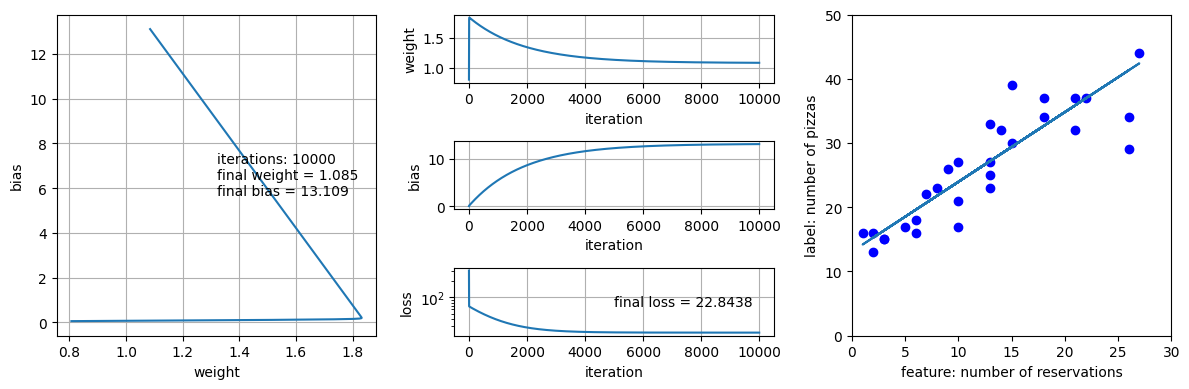

In [13]:
plotpath(ws, bs, losses, x, y, step=1)

## Plot a 3D view

In [14]:
%matplotlib notebook
from matplotlib import cm

In [15]:
ws_pl = np.arange(0, 2.5, 0.02)
bs_pl = np.arange(0, 15, 0.2)
X, Y = np.meshgrid(ws_pl, bs_pl)

Z = np.zeros(X.shape)
for i in range(len(ws_pl)):
    for j in range(len(bs_pl)):
        y_hat = predict(x, ws_pl[i], bs_pl[j])
        Z[j,i] = loss(y_hat, y)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d', computed_zorder=False)
ax.set_xlabel('weight')
ax.set_ylabel('bias')
ax.set_zlabel('loss')
ax.plot_surface(X,Y,Z, linewidth=1, antialiased=True, cmap=cm.Blues)
ax.plot(ws, bs, np.array(losses), 'k-o', linewidth=2)
#ax.view_init(20, 135)

<IPython.core.display.Javascript object>